# Stacked Generative Adversarial Networks

텍스트로 부터 퀄리티 높은 이미지를 합성하는 문제는 단순히 upsampling layer를 붙이는 것으로는 해결할 수 없었다.

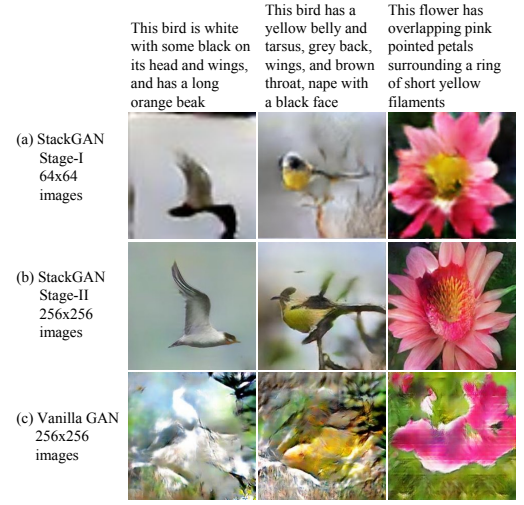

이전의 논문에서는 GAN이 고해상도의 이미지를 생성하는 것은 자연 이미지 데이터 분포와 모델이 생성해낸 데이터 분포가 고해상도 픽셀 영역에서 겹쳐지지 않기 때문에 매우 어려운 문제라고 보았음  

이 논문에서는 Text to High-resolution Realistic Images 를 두가지 문제로 나누어 해결  
1. Text to Low-resolution Images 
2. Text conditional Low-resolution Images to High-resolution Images  


## Conditioning Augmentation

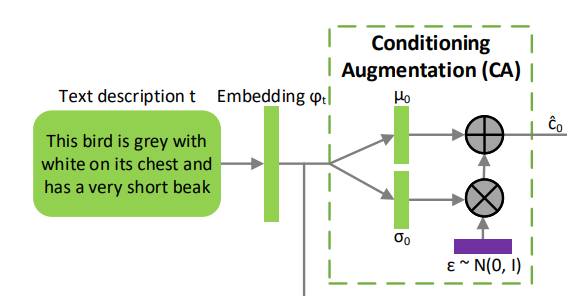

text to low-resolution image task 에서 학습에 사용할 text-image pair 의 수는 제한적이기 때문에 학습이 어렵다.  
이를 해결하기 위해 Conditioning Augmentation을 시행  

먼저 text description $t$를 임베딩하여 $𝜑$ 를 얻는다. 이때 보통 $𝜑$ 의 차원이 매우 크기 때문에 데이터의 매니폴드가 연속적이지 않게 되고 이는 생성자의 학습에 적합하지 않다.  
논문에서는 $𝜑$를 fully connected layer에 통과시켜 $\mu,\space Σ$를 얻어 이를 평균과 분산으로 하는 가우시안 분포에서 sampling을 진행  

추가로 분산에 $ϵ$에 대해서 연산을 더 해줘서 생성자가 다양한 샘플을 생성하도록 하며,

보다 매니폴드를 매끄럽게, overfitting을 피하기 위해서 아래의 regularization term을 추가하여 학습한다. 
$$ D_{KL}(N(\mu_{𝜑}, Σ_{𝜑})||N(0,I)) $$


## Stage-1 GAN 

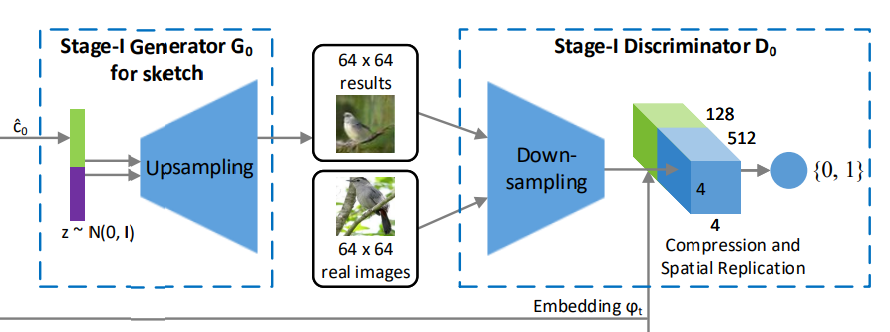

input은 Conditioning Augmentation을 통해 얻은 $c_0$에 임의의 noise를 concatenate한 것으로 upsampling 하여 low-resolution image를 얻어 기존의 GAN과 비슷하게 학습을 진행한다.  

판별자는 real 과 fake를 구분하는 것 뿐만 아니라 주어진 condition에 대한 학습도 하기 위해서 앞서 임베딩한 $𝜑$를 fully connected layer에 통과시켜 얻은 tensor를 downsamling 된 tensor에 결합하여 확률을 구한다. 

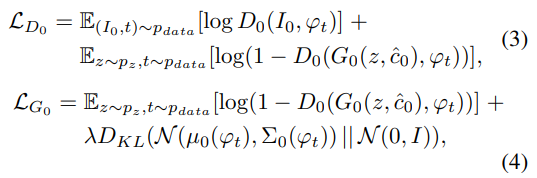

## Stage-2 GAN

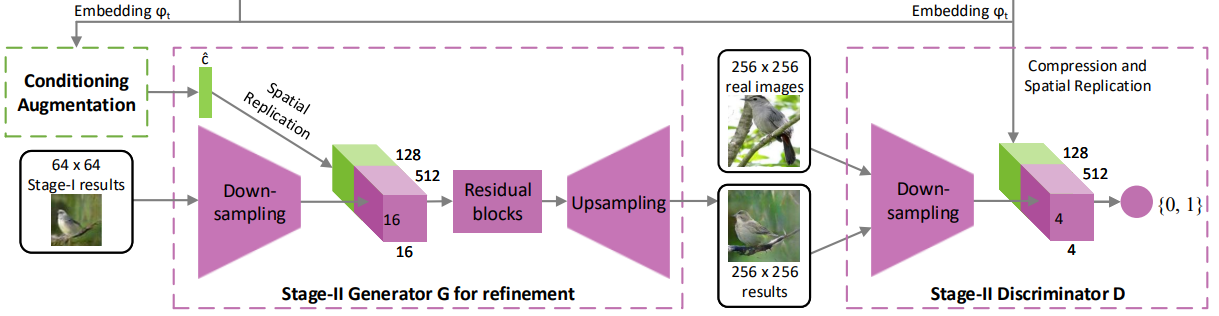

Stage-1 GAN에서 얻은 이미지와 CA에서 얻은 $c_0$를 input으로 하여 학습을 시작하고 이미지를 고해상도로 만들어내기 위해 생성자를 encoder-decoder network with residual block 구조로 만들었다. (이미지와 텍스트 특징 간의 multi-modal representation을 학습하기 위함)

판별자는 Stage-1 GAN 과 동일한 구조임

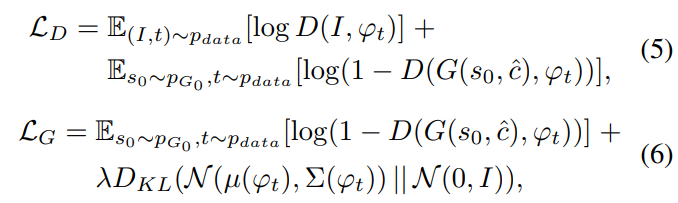

## Results

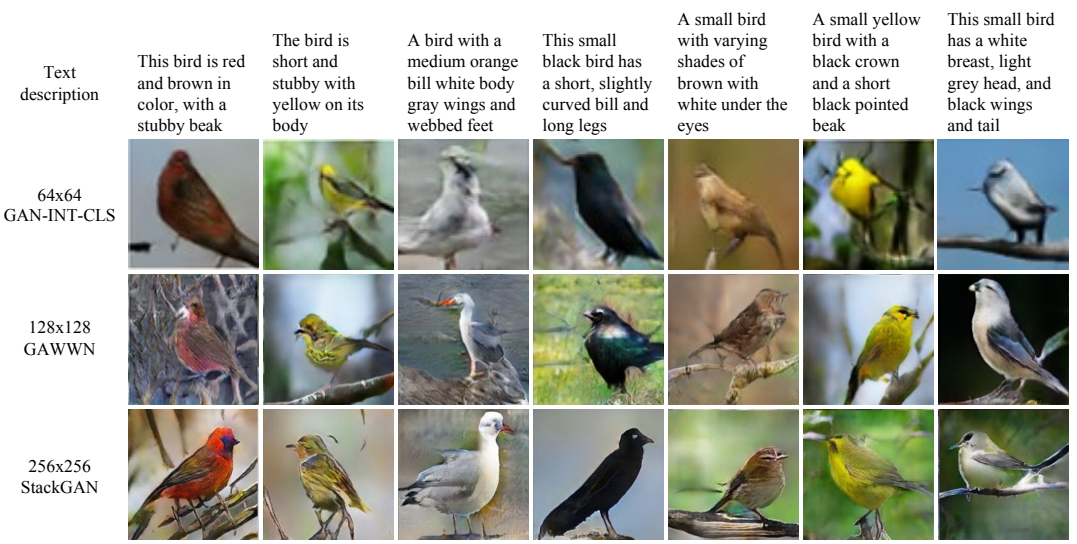

다른 모델과의 비교

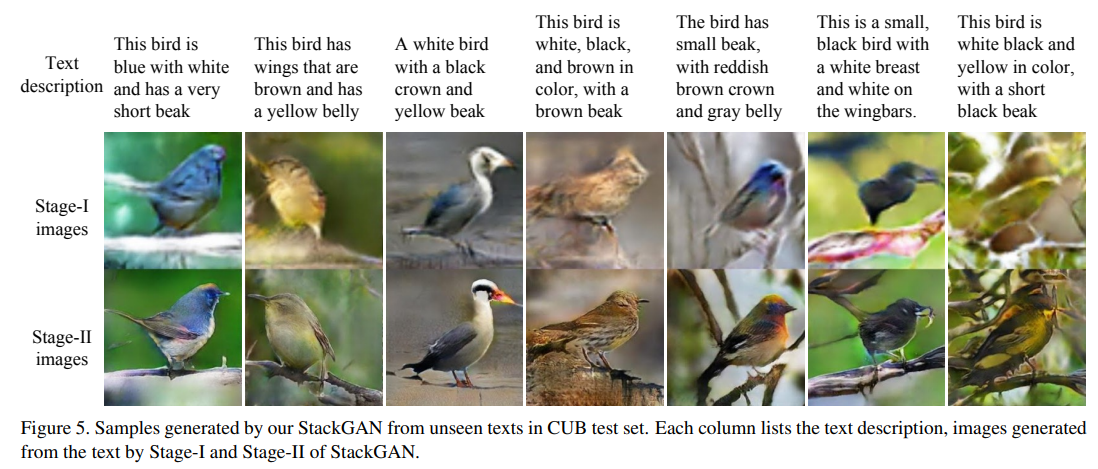

각 Stage에서 생성된 샘플 Stage-2 에서 이미지를 보완해주는 모습이 보인다

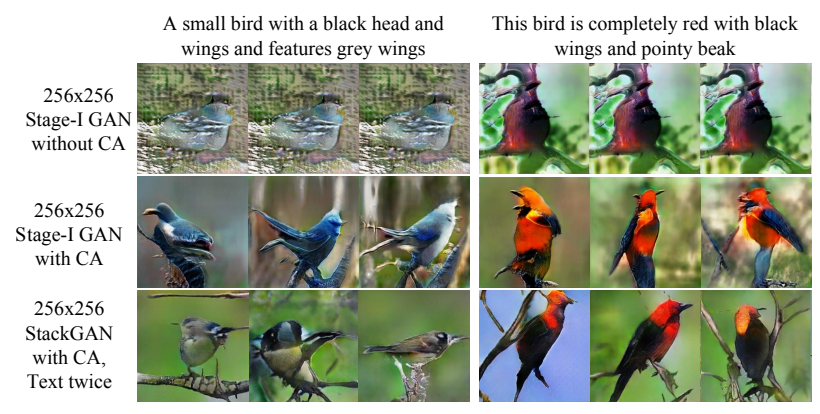

CA가 안정적인 모델 학습을 도와주는것을 볼 수 있다.

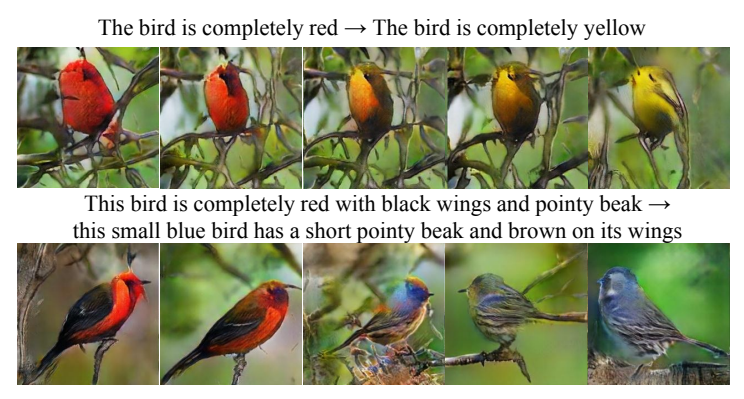

text 간 interpolation

# 코드실습

In [ ]:
https://github.com/hanzhanggit/StackGAN
